<a href="https://colab.research.google.com/github/shashankvankadari/DSCI441_Repository/blob/main/DSCI441_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [25]:
from google.colab import files
uploaded = files.upload()

Saving Sleep_Efficiency.csv to Sleep_Efficiency (1).csv


In [26]:
df = pd.read_csv('Sleep_Efficiency.csv')


In [27]:
df

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,10,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,24,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,28,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,25,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,21,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,30,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,70,10,3.0,0.0,0.0,No,3.0


In [28]:
df = df.drop('ID',axis=1)

# Exploratory Data Analysis

In [29]:
#Replace categorical data with zero and ones
df['Smoking status'] = df['Smoking status'].map({'Yes': 1, 'No': 0})
df['Gender'] =df['Gender'].map({'Male':1,'Female':0})

#Convert bed time and wakeup time to suitable timestamp format
df['Bedtime'] = pd.to_datetime(df['Bedtime'], format='%Y-%m-%d %H:%M:%S')
df['Bedtime'] = df['Bedtime'].apply(lambda x: int(x.timestamp()))
df['Wakeup time'] = pd.to_datetime(df['Wakeup time'], format='%Y-%m-%d %H:%M:%S')
df['Wakeup time'] = df['Wakeup time'].apply(lambda x: int(x.timestamp()))

Both bed time and wake up time are converted into unix time stamp. i.e; No.of seconds since the Unix epoch of January 1, 1970. It converts it into an integer number.  

Smoking status: 'Yes' - 1 ; 'No' - 0
Gender: 'Male' - 1 ; 'Female' - 0

In [30]:
df

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,0,1614992400,1615014000,6.0,0.88,18,70,10,0.0,0.0,0.0,1,3.0
1,69,1,1638669600,1638694800,7.0,0.66,24,28,53,3.0,0.0,3.0,1,3.0
2,40,0,1621978200,1621920600,8.0,0.89,20,70,10,1.0,0.0,0.0,0,3.0
3,40,0,1635906600,1635928200,6.0,0.51,28,25,52,3.0,50.0,5.0,1,1.0
4,57,1,1615597200,1615626000,8.0,0.76,27,55,18,3.0,0.0,3.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,27,0,1636840800,1636781400,7.5,0.91,25,57,21,0.0,0.0,0.0,0,5.0
448,52,1,1617224400,1617159600,6.0,0.74,28,57,21,4.0,25.0,0.0,0,3.0
449,40,0,1631055600,1630999800,8.5,0.55,20,30,48,1.0,NaN,3.0,1,0.0
450,45,1,1627592400,1627531200,7.0,0.76,18,70,10,3.0,0.0,0.0,0,3.0


In [31]:
#Handling null values
print(df.isnull().sum())

Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       16
Smoking status             0
Exercise frequency         6
dtype: int64


There are null values in the dataset. Instead of removing the 60 data points, I did missing value imputation by replacing null values with mean / median of the column. This will preserve the 60 data points instead of completely removing it, which makes the analysis more accurate. 

In [32]:
df['Awakenings'].fillna(df['Awakenings'].mean(), inplace=True)
df['Caffeine consumption'].fillna(df['Caffeine consumption'].mean(), inplace=True)
df['Alcohol consumption'].fillna(df['Alcohol consumption'].mean(), inplace=True)
df['Exercise frequency'].fillna(df['Exercise frequency'].mean(), inplace=True)

In [33]:
#Missing values are filled 
print(df.isnull().sum())

Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64


<Axes: >

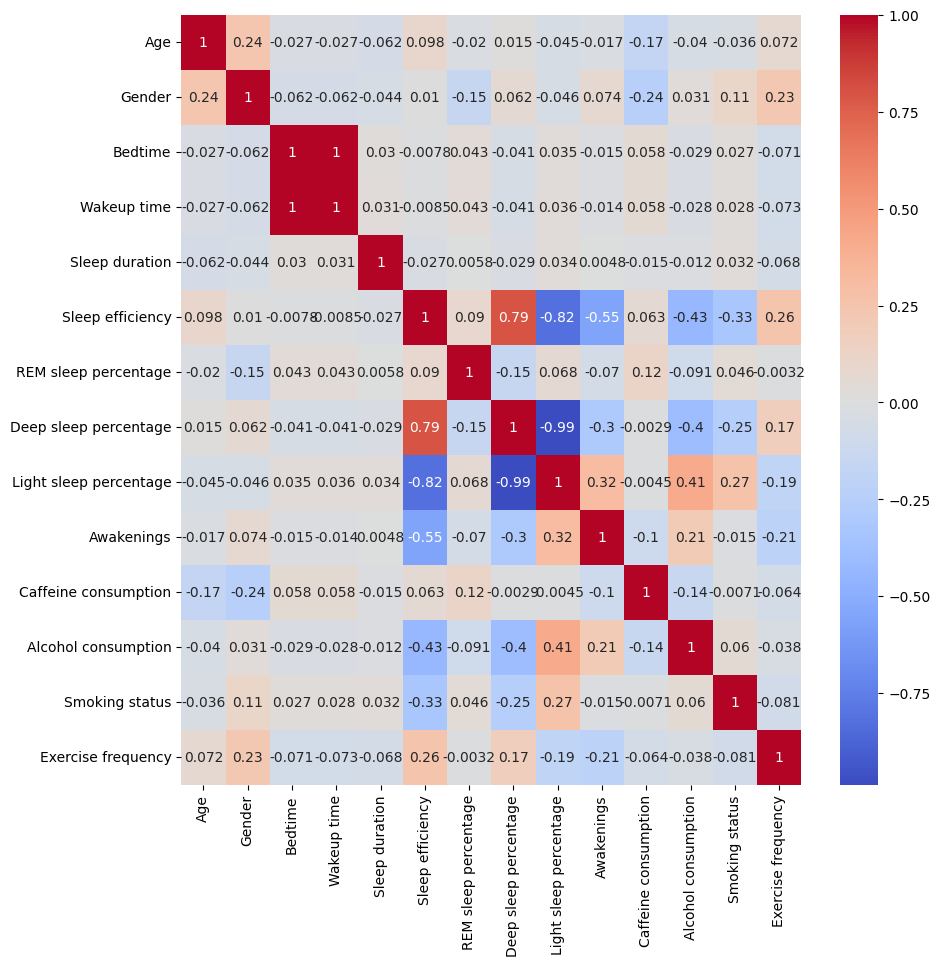

In [34]:
# Checking the correlations

corr_matrix = df.corr()

plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm')

From the above correlation map, we can infer two things:

- Bed time and wake up time has highest correlation. Also we have sleep duration which is time difference between bed time and wake up time. So, in actual sense wake up time can be dropped. But we are not dropping it becoz we have converted it into integers (Unix timestamp), whereas sleep duration is still in hours only. 

- Light sleep and deep sleep are highly negatively correlated. So we can drop Light sleep, as it has negative correlation with target attribute also. 

In [40]:
#Dropping Light sleep percentage. 
df = df.drop('Light sleep percentage',axis=1)
df

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,0,1614992400,1615014000,6.0,0.88,18,70,0.0,0.000000,0.0,1,3.0
1,69,1,1638669600,1638694800,7.0,0.66,24,28,3.0,0.000000,3.0,1,3.0
2,40,0,1621978200,1621920600,8.0,0.89,20,70,1.0,0.000000,0.0,0,3.0
3,40,0,1635906600,1635928200,6.0,0.51,28,25,3.0,50.000000,5.0,1,1.0
4,57,1,1615597200,1615626000,8.0,0.76,27,55,3.0,0.000000,3.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,27,0,1636840800,1636781400,7.5,0.91,25,57,0.0,0.000000,0.0,0,5.0
448,52,1,1617224400,1617159600,6.0,0.74,28,57,4.0,25.000000,0.0,0,3.0
449,40,0,1631055600,1630999800,8.5,0.55,20,30,1.0,23.653396,3.0,1,0.0
450,45,1,1627592400,1627531200,7.0,0.76,18,70,3.0,0.000000,0.0,0,3.0


Most of the columns are categorical and all the numerical variables like bed time, wakeup time, age etc are important for the efficiency. So outliers are not being removed in this data, as outliers are not always useless. 

In [42]:
#Check the data frame statistics
df.describe()

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
count,452.000000,452.000000,4.520000e+02,4.520000e+02,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,40.285398,0.504425,1.626135e+09,1.626121e+09,7.465708,0.788916,23.002212,52.960177,1.641204,23.653396,1.245413,0.356195,1.791480
std,13.172250,0.500534,8.957783e+06,8.955555e+06,0.866625,0.135237,3.972466,15.561713,1.326338,29.353745,1.613923,0.479404,1.418603
min,9.000000,0.000000,1.609634e+09,1.609663e+09,5.000000,0.500000,15.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,1.618362e+09,1.618387e+09,7.000000,0.697500,20.000000,51.250000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,1.000000,1.626824e+09,1.626797e+09,7.500000,0.820000,22.000000,60.000000,1.000000,23.653396,0.000000,0.000000,2.000000
75%,52.000000,1.000000,1.633930e+09,1.633932e+09,8.000000,0.900000,27.000000,63.000000,3.000000,50.000000,2.000000,1.000000,3.000000
max,69.000000,1.000000,1.640984e+09,1.640932e+09,10.000000,0.990000,30.000000,75.000000,4.000000,200.000000,5.000000,1.000000,5.000000


In [ ]:
#Checking for duplicate values
print("Number of duplicates = ", df.duplicated().sum())

Duplicate count =  0


Data distribution for Male and female: 

There are almost equal number of datapoints for Males and Females. Data distribution is good. 

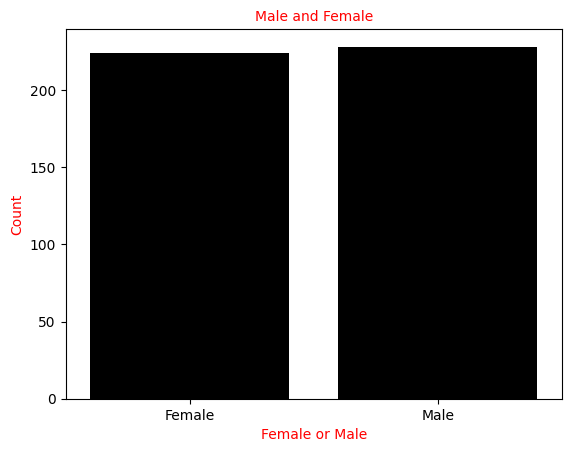

In [44]:
sns.countplot(data=df,x="Gender", color="black")
plt.xlabel("Gender", color="red",fontsize=10)
plt.xticks([0,1], ['Female', 'Male'])
plt.ylabel("Count", color="red",fontsize=10)
plt.title("Male and Female", color="red",fontsize=10)
plt.show()

Data distribution for Smoking status:
There are almost double the number of datapoints for non-smokers in comparision to the ones who smoke. 

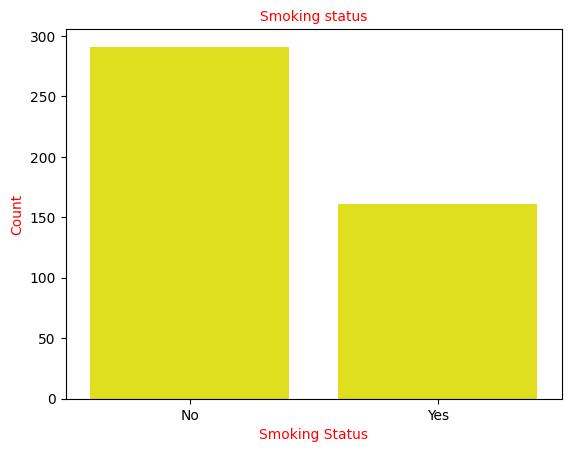

In [45]:
sns.countplot(data=df,x="Smoking status", color="yellow")
plt.xlabel("Smoking Status", color="red",fontsize=10)
plt.xticks([0,1], ['No', 'Yes'])
plt.ylabel("Count", color="red",fontsize=10)
plt.title("Smoking status", color="red",fontsize=10)
plt.show()

Data distribution for Awakenings:

The number of datapoints for the ones who have one awakening is more than compared to the other test subjects. 

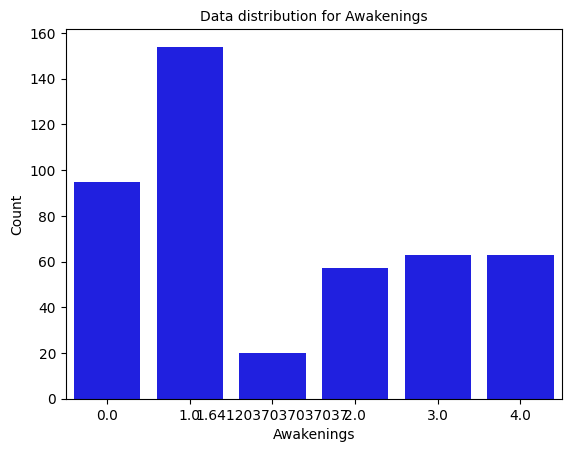

In [46]:
sns.countplot(data=df,x="Awakenings", color="blue")
plt.xlabel("Awakenings", color="black",fontsize=10)
plt.ylabel("Count", color="black",fontsize=10)
plt.title("Data distribution for Awakenings", color="black",fontsize=10)
plt.show()

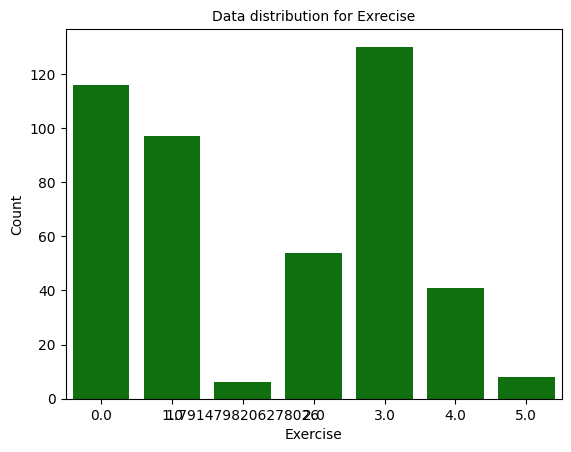

In [47]:
sns.countplot(data=df,x="Exercise frequency", color="green")
plt.xlabel("Exercise", color="black",fontsize=10)
plt.ylabel("Count", color="black",fontsize=10)
plt.title("Data distribution for Exrecise", color="black",fontsize=10)
plt.show()

Decision on Fairness evaluation: 

From the above data distribution, it is only for 'Gender' column for which data is properly distributed. So we use this column to evaluate the fairness of our models as there is no bias. 

# Model Building

Regression Model - Linear regression. 

In [49]:
#Make a copy of the dataframe 

df1 = df.copy()

# Use df1 for Regression models and df for classification models.  


In [51]:
#Linear regression model with K fold cross validation: 

#Separate the target variable.

y1 = df1['Sleep efficiency']
X1 = df1.drop('Sleep efficiency',axis=1)

from sklearn.model_selection import KFold
n_splits = 5

# Create the cross-validation object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

mse_list = []
r2_list = []

# Loop over the folds and split the data
for i, j in kf.split(X1):
    X1_train, X1_test = X1.iloc[i], X1.iloc[j]
    y1_train, y1_test = y1.iloc[i], y1.iloc[j]
    
    # Linear regression model
    model1 = LinearRegression()
    model1.fit(X1_train, y1_train)
    
    y1_pred = model1.predict(X1_test)
    
    # Mean squared error
    mse = mean_squared_error(y1_test, y1_pred)
    r2 = r2_score(y1_test, y1_pred)

    mse_list.append(mse)
    r2_list.append(r2)

#Calculate the mse and r2
final_mse = sum(mse_list) / len(mse_list)
final_r2 = sum(r2_list) / len(r2_list)

print('Average MSE:', final_mse)
print('Average R2:', final_r2)

Average MSE: 0.0036467755194524235
Average R2: 0.7956409814301962


Classification model

In [14]:
#Convert the target variable into categorical variable
import pandas as pd

# create a pandas series from the list of values
series = pd.Series(df['Sleep efficiency'])

# create bins for the categorical function
bins = [0, 0.33, 0.66, 1]

# create labels for each bin
labels = ['Worst', 'Average', 'Best']

# use categorical to categorize the series into the bins
categorized_series = pd.Categorical(pd.cut(series, bins=bins, labels=labels),
                                     categories=labels,
                                     ordered=True)
df['Target Variable'] = categorized_series
df = df.drop('Sleep efficiency',axis=1)








In [15]:
df

,Age,Gender,Bedtime,Wakeup time,Sleep duration,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Target Variable
0,65,0,1614992400,1615014000,6.0,18,70,10,0.0,0.000000,0.0,1,3.0,Best
1,69,1,1638669600,1638694800,7.0,24,28,53,3.0,0.000000,3.0,1,3.0,Average
2,40,0,1621978200,1621920600,8.0,20,70,10,1.0,0.000000,0.0,0,3.0,Best
3,40,0,1635906600,1635928200,6.0,28,25,52,3.0,50.000000,5.0,1,1.0,Average
4,57,1,1615597200,1615626000,8.0,27,55,18,3.0,0.000000,3.0,0,3.0,Best
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,27,0,1636840800,1636781400,7.5,25,57,21,0.0,0.000000,0.0,0,5.0,Best
448,52,1,1617224400,1617159600,6.0,28,57,21,4.0,25.000000,0.0,0,3.0,Best
449,40,0,1631055600,1630999800,8.5,20,30,48,1.0,23.653396,3.0,1,0.0,Average
450,45,1,1627592400,1627531200,7.0,18,70,10,3.0,0.000000,0.0,0,3.0,Best


In [16]:
df['Target Variable']

0         Best
1      Average
2         Best
3      Average
4         Best
        ...   
447       Best
448       Best
449    Average
450       Best
451    Average
Name: Target Variable, Length: 452, dtype: category
Categories (3, object): ['Worst' < 'Average' < 'Best']

In [ ]:
#Apply Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y = df['Target Variable']
X = df.drop('Target Variable',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()

# Model fitting
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.967032967032967
